In [ ]:
import torch
import torchvision.datasets as dset
import torchvision.models as models
import torchvision.transforms as trans
import torch.nn.functional as F
from tqdm import tqdm
from matplotlib import pyplot as plt
import numpy as np
import pickle
import random

IMAGENET_TRANSFORM = trans.Compose([trans.ToTensor()])

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
testset = dset.ImageFolder('/content/drive/MyDrive/SMAI_proj/Imagenet16v2/val', IMAGENET_TRANSFORM)

In [ ]:
idx = pickle.load(open('idx','rb'))

In [ ]:
mapping = pickle.load(open('mapping','rb'))

In [ ]:
class Simba:
  def __init__(self, model_name, epsilon = 0.5):
    self.model = getattr(models, model_name)(pretrained=True)
    self.epsilon = epsilon
    self.model.eval()
  
  def getAttackIteration(self,img, itr = 10000): # max iteration: 12288
    data,_ = img
    res = self.model(data.unsqueeze(0))
    res = torch.squeeze(res)
    res = res[mapping]
    # print(res.shape)
    actual_class = torch.argmax(res)
    last_prob = F.softmax(res,dim=-1)[actual_class]
    length = torch.numel(data)
    rand = torch.randperm(length)
    image = data
    for i in tqdm(range(itr)):
      noise = torch.zeros(length)
      noise[rand[i]] += self.epsilon 
      # check addition
      new_image = torch.flatten(image) + noise
      new_image = new_image.reshape(data.shape)
      res = self.model(new_image.unsqueeze(0))  
      res = torch.squeeze(res)
      res = res[mapping]
      new_class = torch.argmax(res)
      if new_class != actual_class:
        image = new_image
        break
      new_prob = F.softmax(res,dim=-1)[actual_class]
      if new_prob > last_prob:
        #check substraction
        new_image = torch.flatten(image) - noise
        new_image = new_image.reshape(data.shape)
        res = self.model(new_image.unsqueeze(0))
        res = torch.squeeze(res)
        res = res[mapping]
        new_class = torch.argmax(res)
        if new_class != actual_class:
          image = new_image
          break
        new_prob = F.softmax(res,dim=-1)[actual_class]
        if new_prob < last_prob:
          image = new_image
          last_prob = new_prob
      else:
        image = new_image
        last_prob = new_prob
      # print(last_prob)class Simba:
  def __init__(self, model_name, epsilon = 0.5):
    self.model = getattr(models, model_name)(pretrained=True)
    self.epsilon = epsilon
    self.model.eval()
  
  def getAttackIteration(self,img, itr = 10000): # max iteration: 12288
    data,_ = img
    res = self.model(data.unsqueeze(0))
    res = torch.squeeze(res)
    res = res[mapping]
    # print(res.shape)
    actual_class = torch.argmax(res)
    last_prob = F.softmax(res,dim=-1)[actual_class]
    length = torch.numel(data)
    rand = torch.randperm(length)
    image = data
    for i in tqdm(range(itr)):
      noise = torch.zeros(length)
      noise[rand[i]] += self.epsilon 
      # check addition
      new_image = torch.flatten(image) + noise
      new_image = new_image.reshape(data.shape)
      res = self.model(new_image.unsqueeze(0))  
      res = torch.squeeze(res)
      res = res[mapping]
      new_class = torch.argmax(res)
      if new_class != actual_class:
        image = new_image
        break
      new_prob = F.softmax(res,dim=-1)[actual_class]
      if new_prob > last_prob:
        #check substraction
        new_image = torch.flatten(image) - noise
        new_image = new_image.reshape(data.shape)
        res = self.model(new_image.unsqueeze(0))
        res = torch.squeeze(res)
        res = res[mapping]
        new_class = torch.argmax(res)
        if new_class != actual_class:
          image = new_image
          break
        new_prob = F.softmax(res,dim=-1)[actual_class]
        if new_prob < last_prob:
          image = new_image
          last_prob = new_prob
      else:
        image = new_image
        last_prob = new_prob
      # print(last_prob)
    return new_image, i


In [ ]:
labels = pickle.load(open('labels.pkl','rb'))
len(testset)

10014

attack on image 200


  1%|          | 67/10000 [00:01<03:55, 42.17it/s]


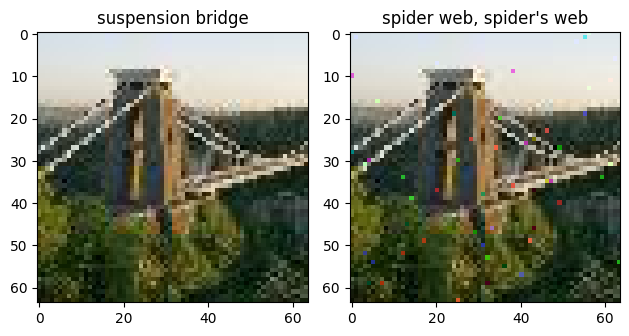

successful attack ratio: 1.0
67.0
attack on image 201


  0%|          | 25/10000 [00:00<03:16, 50.89it/s]


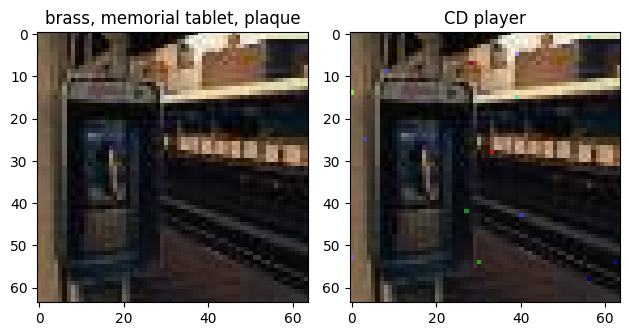

successful attack ratio: 1.0
46.0
attack on image 202


  0%|          | 5/10000 [00:00<02:31, 66.18it/s]


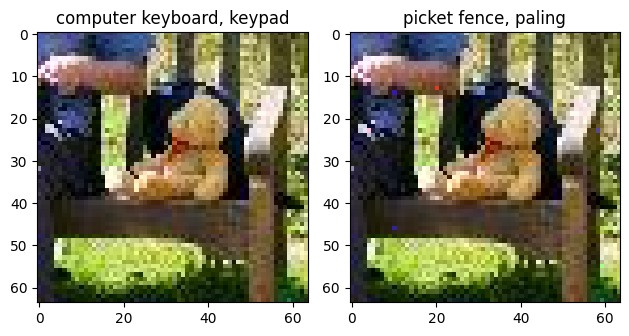

successful attack ratio: 1.0
32.333333333333336
attack on image 203


  0%|          | 2/10000 [00:00<06:22, 26.12it/s]


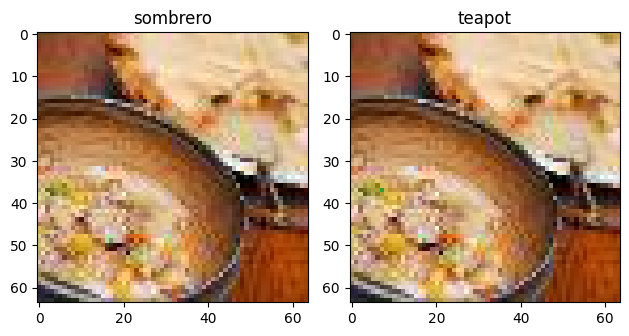

successful attack ratio: 1.0
24.75
attack on image 204


  0%|          | 2/10000 [00:00<11:11, 14.89it/s]


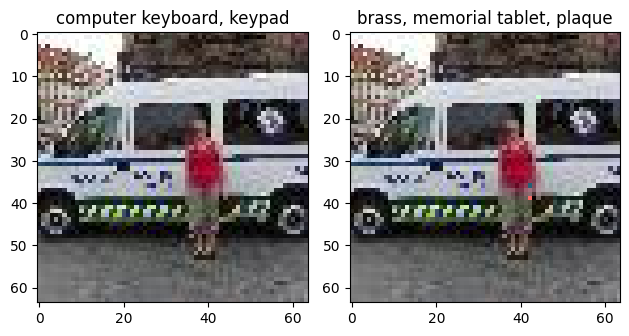

successful attack ratio: 1.0
20.2
attack on image 205


  0%|          | 13/10000 [00:00<03:19, 49.96it/s]


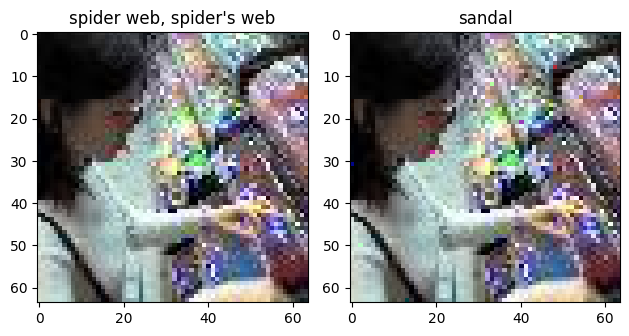

successful attack ratio: 1.0
19.0
attack on image 206


  1%|          | 53/10000 [00:01<03:44, 44.31it/s]


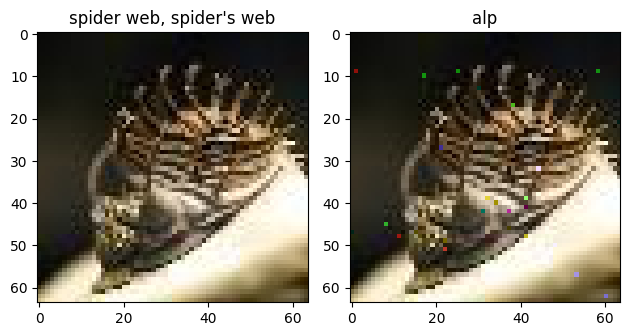

successful attack ratio: 1.0
23.857142857142858
attack on image 207


  2%|▏         | 189/10000 [00:04<03:37, 45.09it/s]


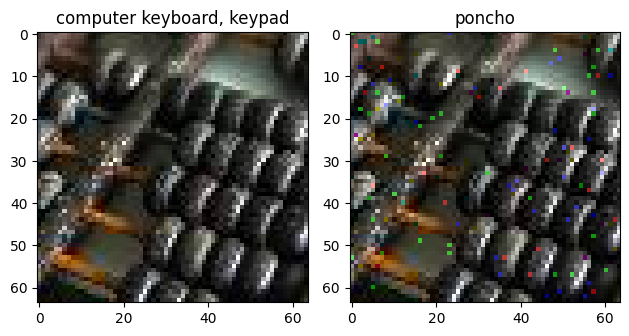

successful attack ratio: 1.0
44.5
attack on image 208


  0%|          | 34/10000 [00:00<04:14, 39.13it/s]


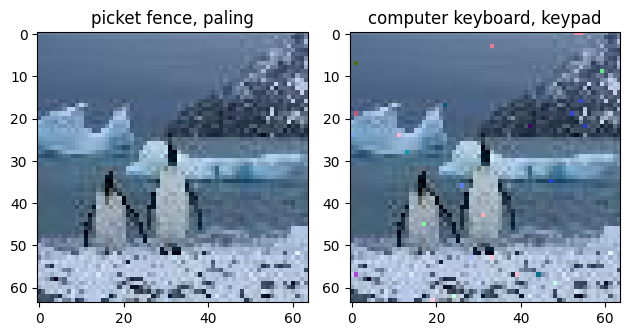

successful attack ratio: 1.0
43.333333333333336
attack on image 209


  0%|          | 19/10000 [00:00<04:33, 36.52it/s]


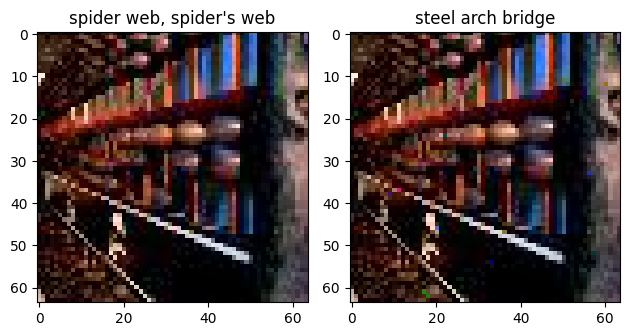

successful attack ratio: 1.0
40.9
attack on image 210


  0%|          | 17/10000 [00:00<03:11, 52.01it/s]


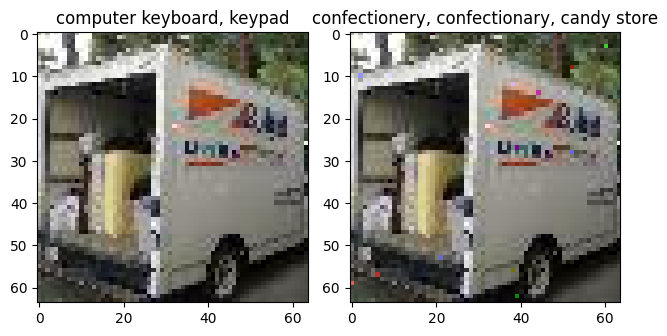

successful attack ratio: 1.0
38.72727272727273
attack on image 211


  0%|          | 6/10000 [00:00<04:25, 37.68it/s]


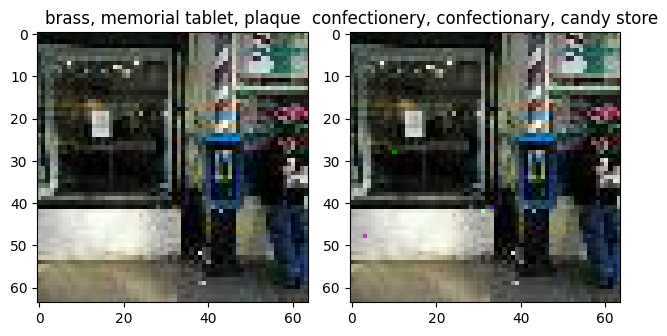

successful attack ratio: 1.0
36.0
attack on image 212


  0%|          | 44/10000 [00:00<02:59, 55.38it/s]


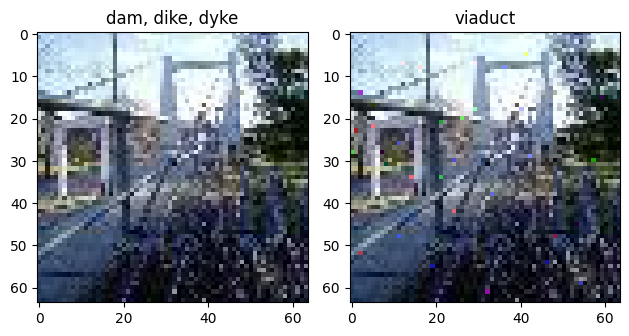

successful attack ratio: 1.0
36.61538461538461
attack on image 213


  0%|          | 43/10000 [00:00<03:06, 53.52it/s]


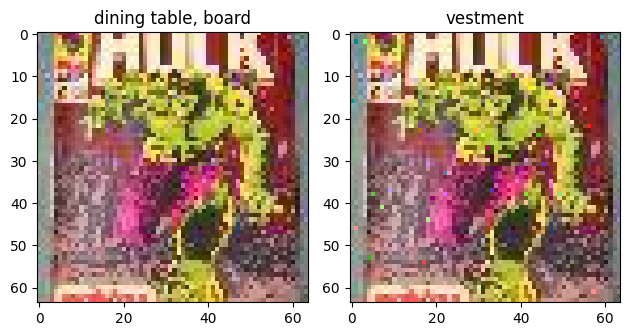

successful attack ratio: 1.0
37.07142857142857
attack on image 214


  0%|          | 14/10000 [00:00<03:50, 43.41it/s]


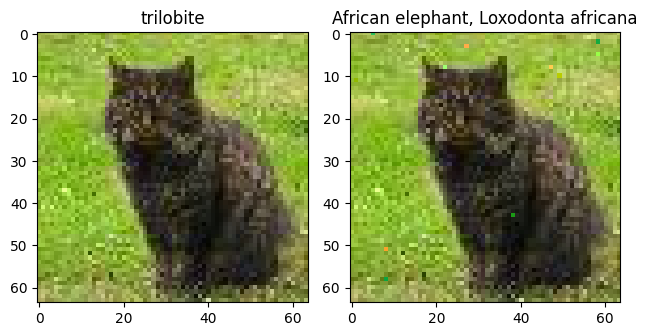

successful attack ratio: 1.0
35.53333333333333
attack on image 215


  0%|          | 20/10000 [00:00<03:47, 43.84it/s]


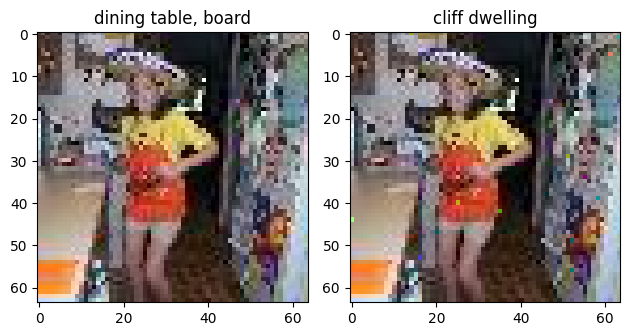

successful attack ratio: 1.0
34.5625
attack on image 216


  0%|          | 42/10000 [00:00<03:17, 50.42it/s]


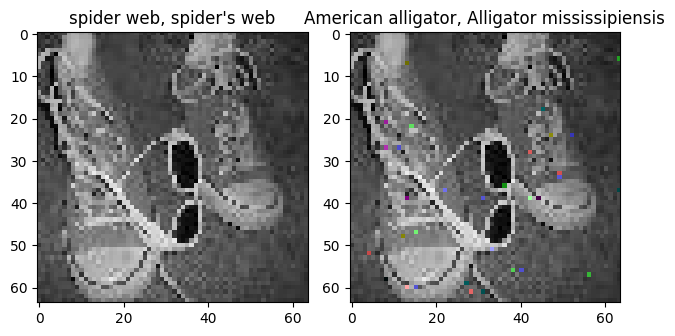

successful attack ratio: 1.0
35.0
attack on image 217


  0%|          | 48/10000 [00:00<02:55, 56.60it/s]


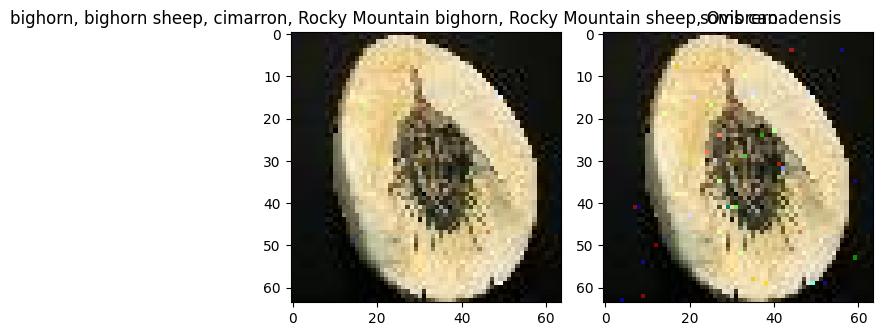

successful attack ratio: 1.0
35.72222222222222
attack on image 218


  0%|          | 29/10000 [00:00<03:40, 45.22it/s]


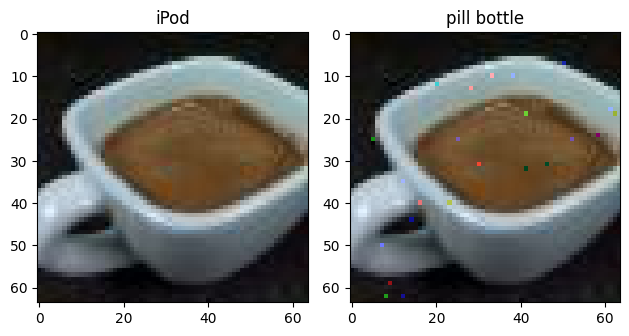

successful attack ratio: 1.0
35.36842105263158
attack on image 219


  1%|          | 68/10000 [00:01<04:25, 37.41it/s]


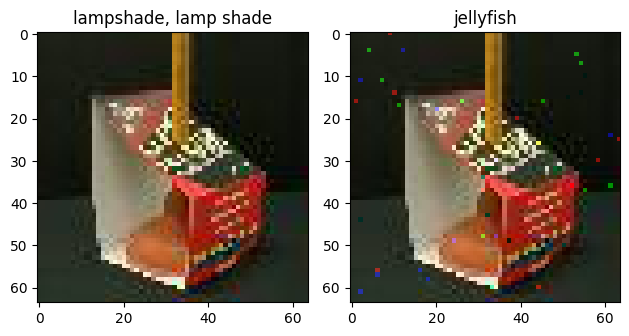

successful attack ratio: 1.0
37.0
attack on image 220


  0%|          | 22/10000 [00:00<04:01, 41.24it/s]


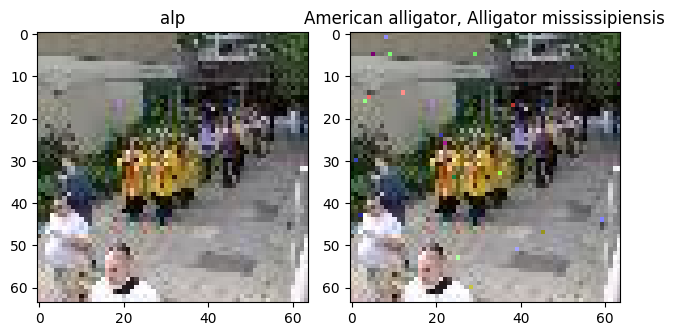

successful attack ratio: 1.0
36.285714285714285
attack on image 221


  0%|          | 35/10000 [00:00<03:11, 52.12it/s]


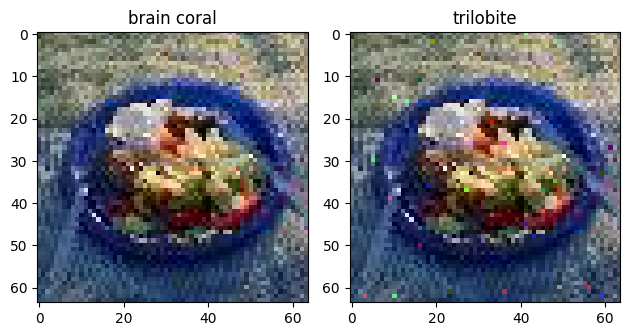

successful attack ratio: 1.0
36.22727272727273
attack on image 222


  0%|          | 36/10000 [00:00<03:47, 43.85it/s]


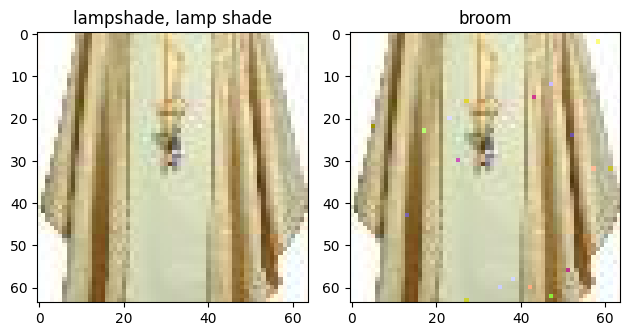

successful attack ratio: 1.0
36.21739130434783
attack on image 223


  0%|          | 25/10000 [00:00<04:31, 36.70it/s]


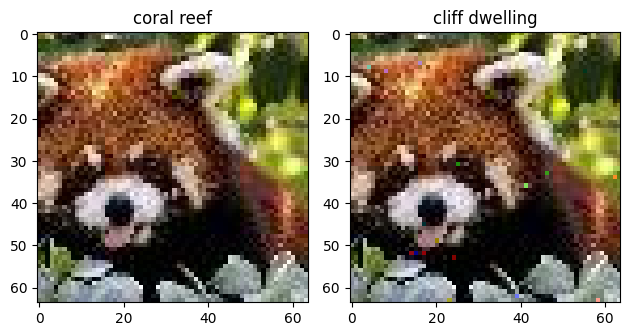

successful attack ratio: 1.0
35.75
attack on image 224


  0%|          | 2/10000 [00:00<06:17, 26.50it/s]


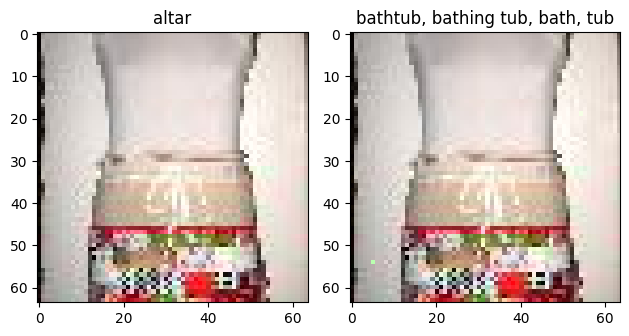

successful attack ratio: 1.0
34.4
attack on image 225


  0%|          | 0/10000 [00:00<?, ?it/s]


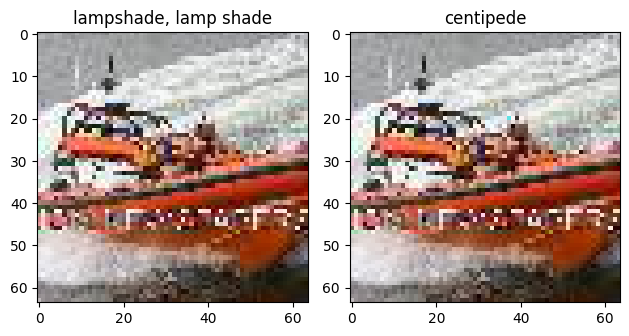

successful attack ratio: 1.0
33.07692307692308
attack on image 226


  0%|          | 2/10000 [00:00<06:17, 26.45it/s]


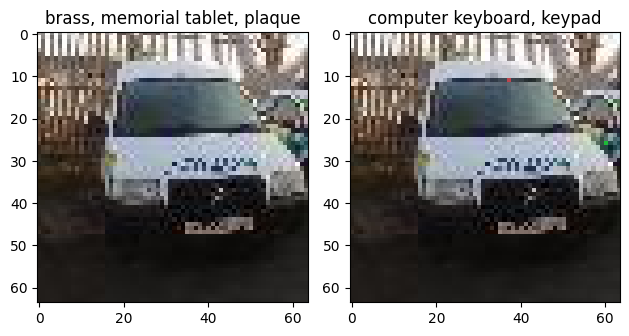

successful attack ratio: 1.0
31.925925925925927
attack on image 227


  0%|          | 36/10000 [00:00<04:22, 37.98it/s]


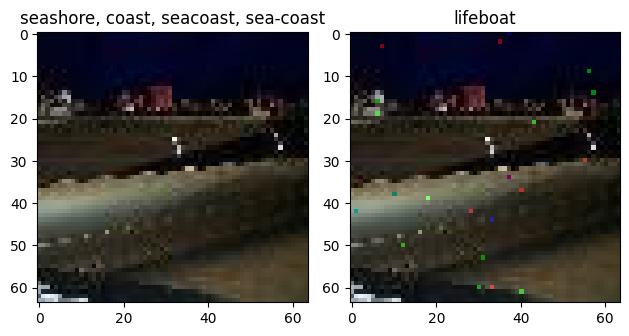

successful attack ratio: 1.0
32.07142857142857
attack on image 228


  1%|          | 73/10000 [00:01<03:44, 44.20it/s]


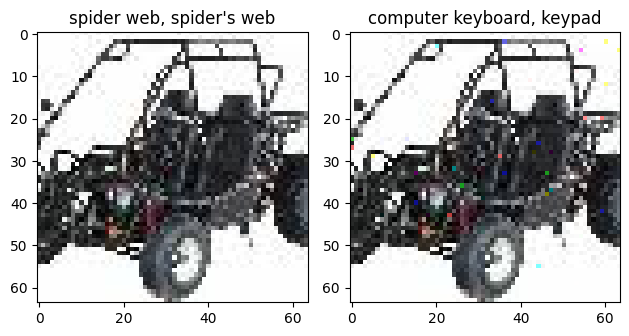

successful attack ratio: 1.0
33.48275862068966
attack on image 229


  0%|          | 8/10000 [00:00<04:17, 38.74it/s]


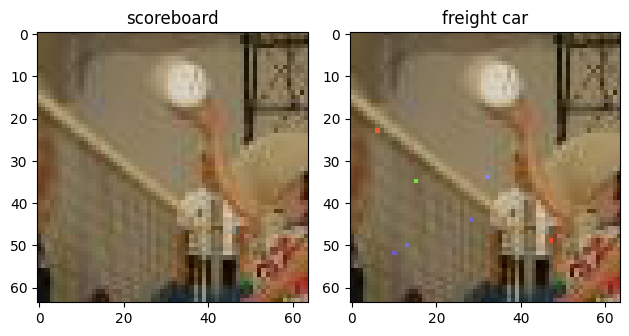

successful attack ratio: 1.0
32.63333333333333
attack on image 230


  0%|          | 22/10000 [00:00<04:25, 37.61it/s]


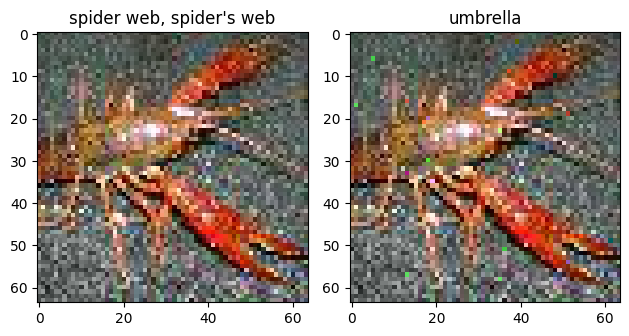

successful attack ratio: 1.0
32.29032258064516
attack on image 231


  0%|          | 17/10000 [00:00<05:36, 29.71it/s]


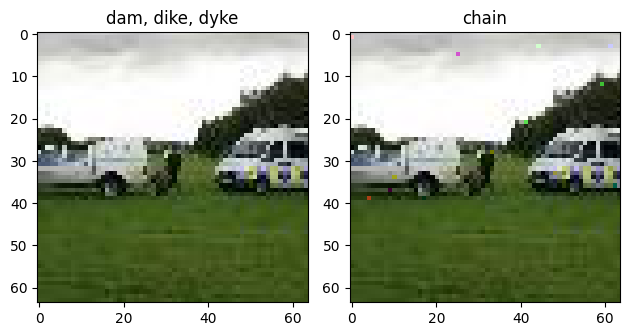

successful attack ratio: 1.0
31.8125
attack on image 232


  0%|          | 23/10000 [00:00<03:38, 45.57it/s]


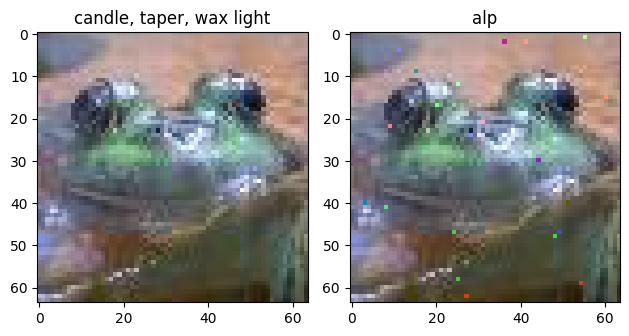

successful attack ratio: 1.0
31.545454545454547
attack on image 233


  1%|          | 51/10000 [00:01<03:53, 42.59it/s]


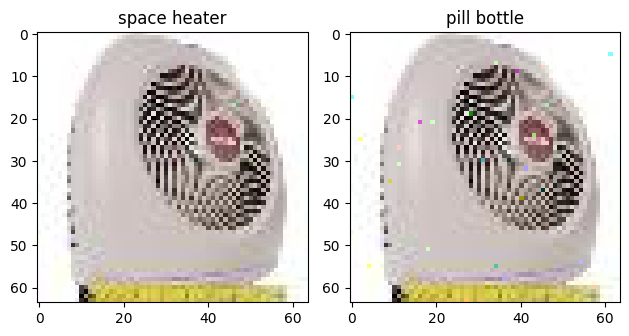

successful attack ratio: 1.0
32.11764705882353
attack on image 234


  0%|          | 30/10000 [00:00<03:51, 43.08it/s]


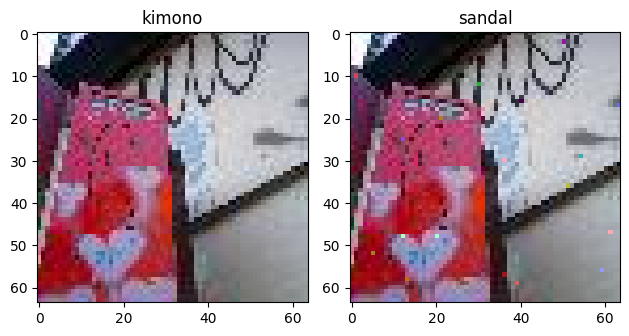

successful attack ratio: 1.0
32.05714285714286
attack on image 235


  0%|          | 23/10000 [00:00<03:32, 46.85it/s]


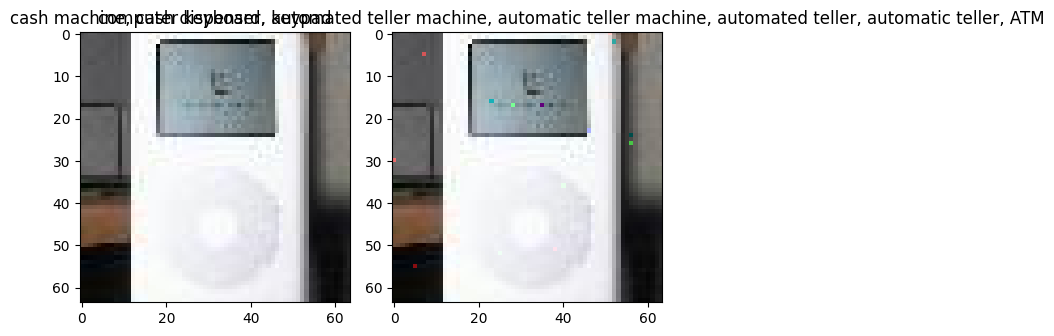

successful attack ratio: 1.0
31.805555555555557
attack on image 236


  0%|          | 6/10000 [00:00<03:50, 43.27it/s]


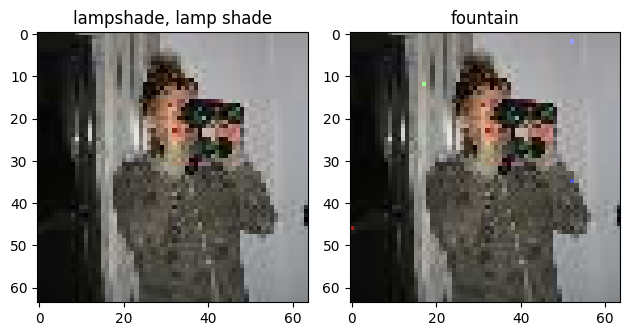

successful attack ratio: 1.0
31.10810810810811
attack on image 237


  0%|          | 2/10000 [00:00<04:28, 37.28it/s]


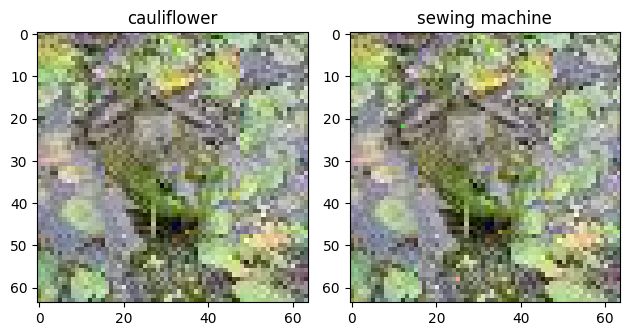

successful attack ratio: 1.0
30.342105263157894
attack on image 238


  1%|          | 87/10000 [00:01<03:21, 49.17it/s]


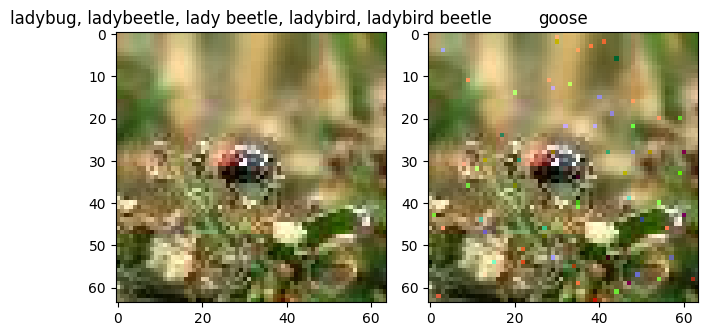

successful attack ratio: 1.0
31.794871794871796
attack on image 239


  0%|          | 10/10000 [00:00<03:07, 53.19it/s]


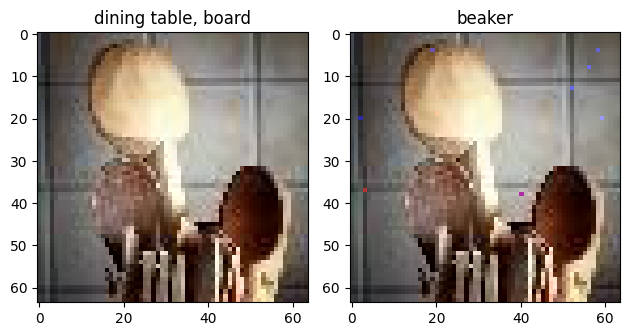

successful attack ratio: 1.0
31.25
attack on image 240


  1%|          | 71/10000 [00:01<04:05, 40.43it/s]


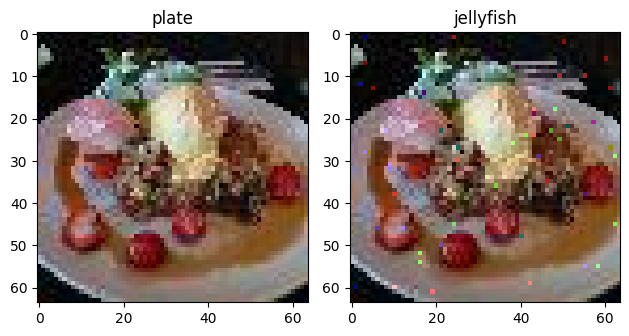

successful attack ratio: 1.0
32.21951219512195
attack on image 241


  0%|          | 4/10000 [00:00<05:18, 31.35it/s]


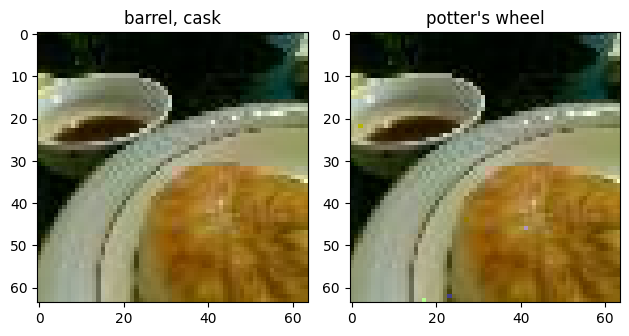

successful attack ratio: 1.0
31.547619047619047
attack on image 242


  1%|          | 60/10000 [00:01<04:38, 35.70it/s]


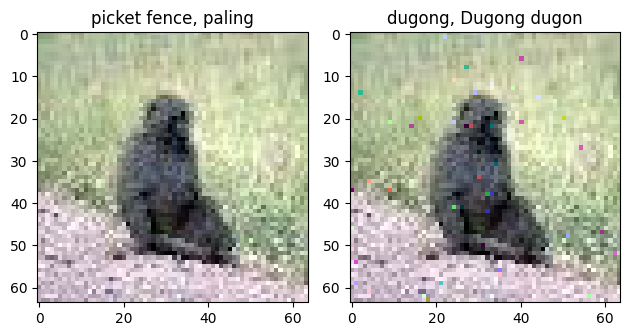

successful attack ratio: 1.0
32.2093023255814
attack on image 243


  0%|          | 13/10000 [00:00<03:34, 46.66it/s]


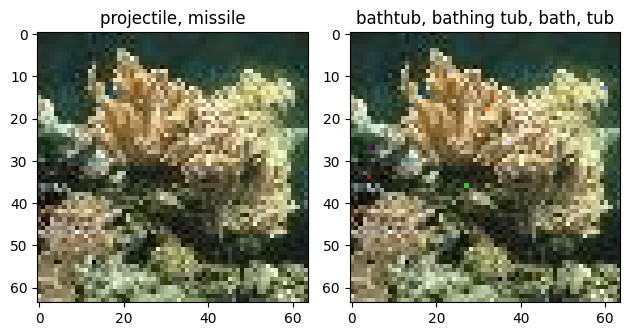

successful attack ratio: 1.0
31.772727272727273
attack on image 244


  0%|          | 0/10000 [00:00<?, ?it/s]


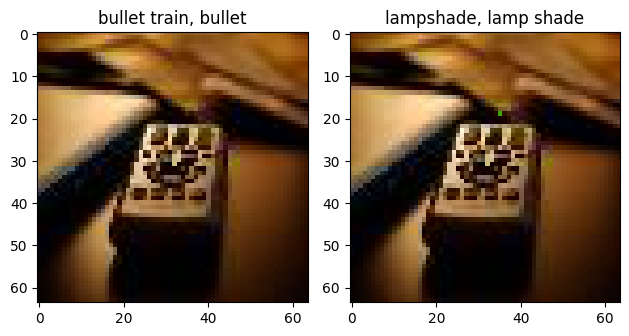

successful attack ratio: 1.0
31.066666666666666
attack on image 245


  0%|          | 20/10000 [00:00<03:46, 44.07it/s]


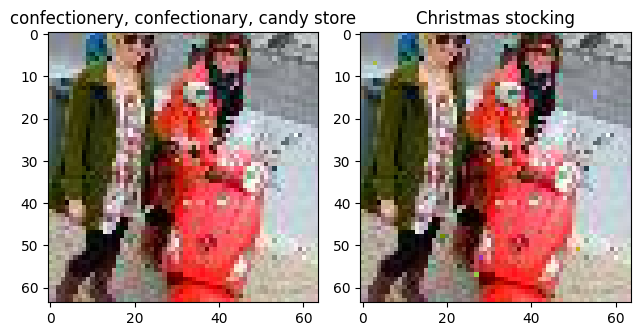

successful attack ratio: 1.0
30.82608695652174
attack on image 246


  0%|          | 24/10000 [00:00<03:24, 48.67it/s]


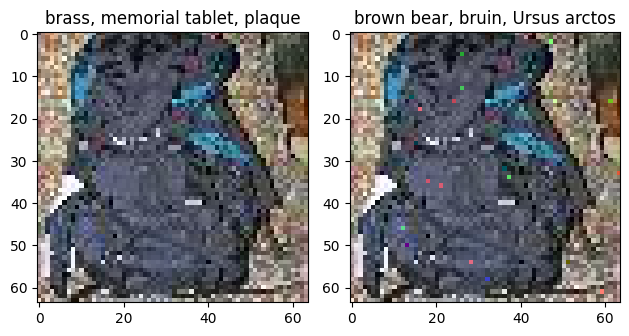

successful attack ratio: 1.0
30.680851063829788
attack on image 247


  0%|          | 2/10000 [00:00<06:09, 27.05it/s]


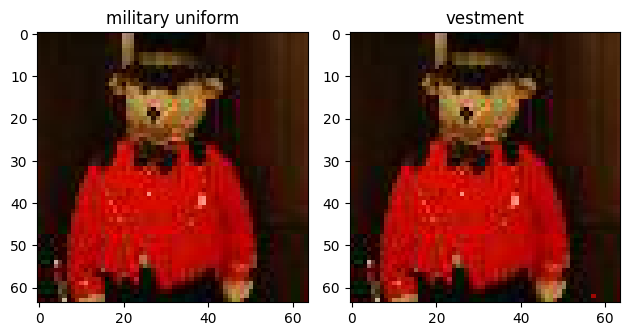

successful attack ratio: 1.0
30.083333333333332
attack on image 248


  1%|          | 60/10000 [00:01<04:32, 36.54it/s]


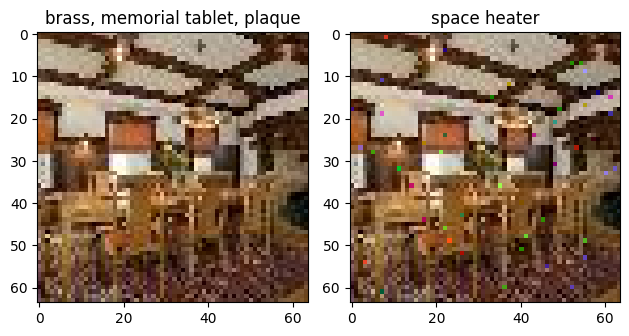

successful attack ratio: 1.0
30.693877551020407
attack on image 249


  1%|          | 94/10000 [00:02<04:05, 40.43it/s]


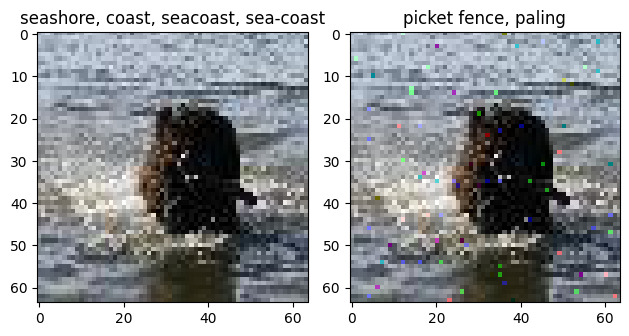

successful attack ratio: 1.0
31.96
attack on image 250


  0%|          | 16/10000 [00:00<06:17, 26.47it/s]


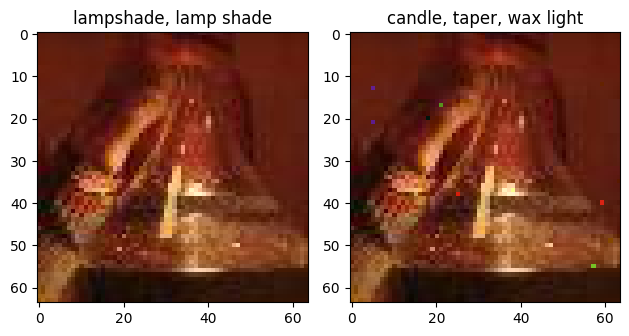

successful attack ratio: 1.0
31.647058823529413
attack on image 251


  0%|          | 16/10000 [00:00<05:20, 31.13it/s]


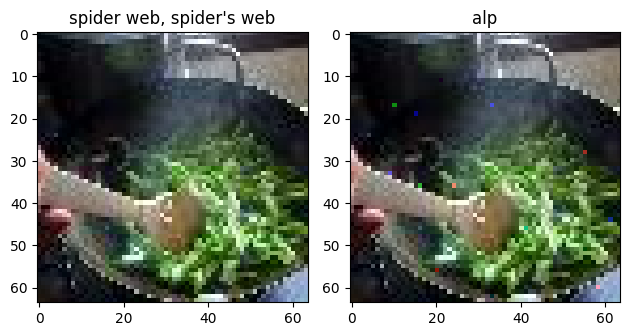

successful attack ratio: 1.0
31.346153846153847
attack on image 252


  0%|          | 17/10000 [00:00<05:00, 33.24it/s]


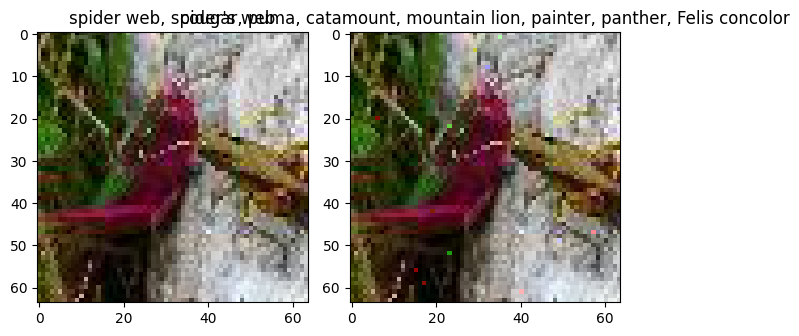

successful attack ratio: 1.0
31.07547169811321
attack on image 253


  0%|          | 8/10000 [00:00<06:27, 25.77it/s]


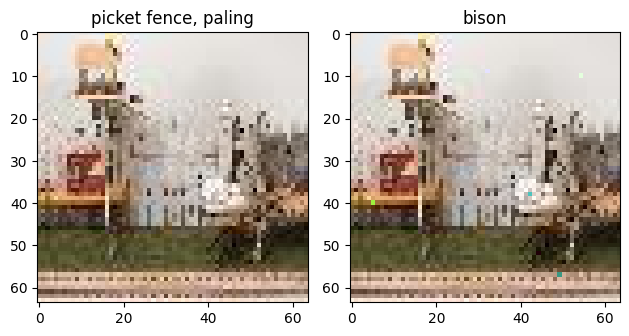

successful attack ratio: 1.0
30.64814814814815
attack on image 254


  0%|          | 21/10000 [00:00<03:14, 51.23it/s]


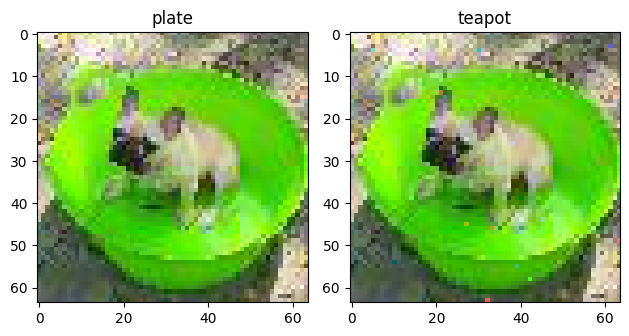

successful attack ratio: 1.0
30.472727272727273
attack on image 255


  0%|          | 9/10000 [00:00<03:49, 43.54it/s]


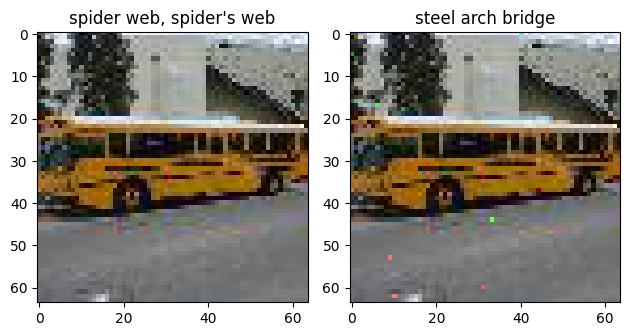

successful attack ratio: 1.0
30.089285714285715
attack on image 256


  0%|          | 1/10000 [00:00<08:50, 18.84it/s]


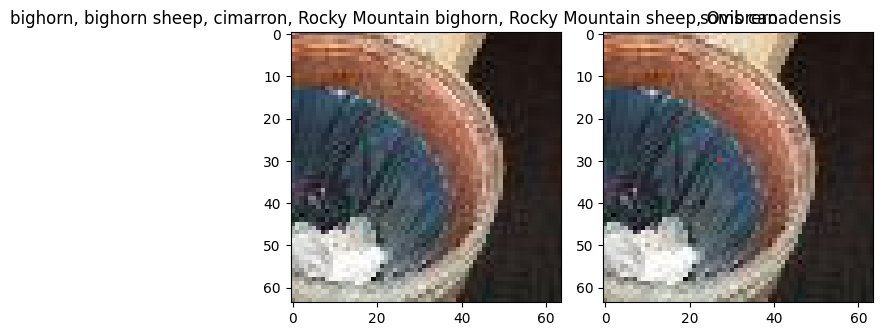

successful attack ratio: 1.0
29.57894736842105
attack on image 257


  1%|          | 111/10000 [00:02<03:32, 46.48it/s]


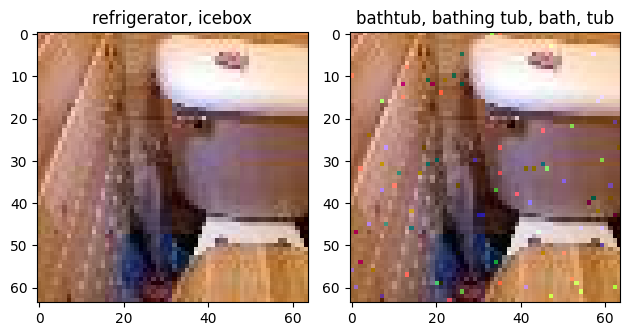

successful attack ratio: 1.0
30.982758620689655
attack on image 258


  1%|          | 98/10000 [00:02<04:03, 40.74it/s]


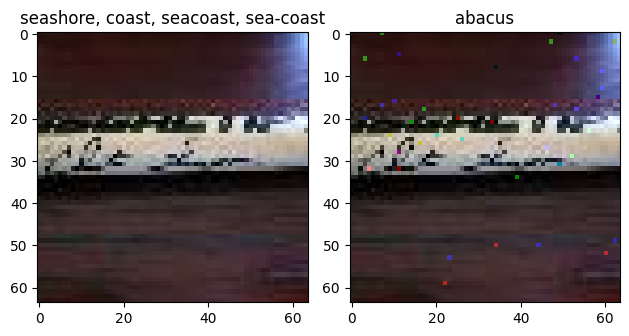

successful attack ratio: 1.0
32.11864406779661
attack on image 259


  0%|          | 47/10000 [00:01<03:36, 46.03it/s]


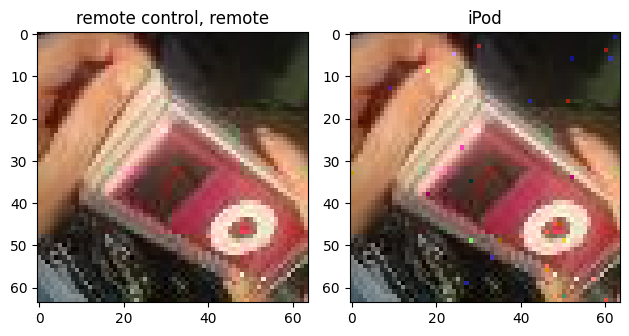

successful attack ratio: 1.0
32.36666666666667
attack on image 260


  0%|          | 48/10000 [00:01<04:44, 34.93it/s]


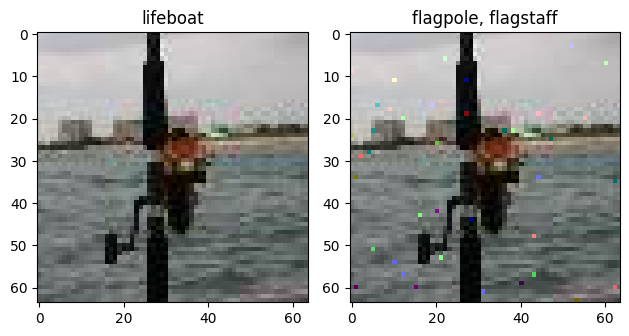

successful attack ratio: 1.0
32.622950819672134
attack on image 261


  0%|          | 2/10000 [00:00<10:07, 16.45it/s]


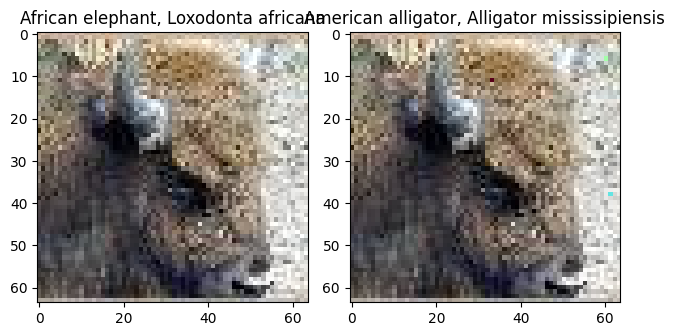

successful attack ratio: 1.0
32.12903225806452
attack on image 262


  1%|          | 59/10000 [00:01<04:58, 33.28it/s]


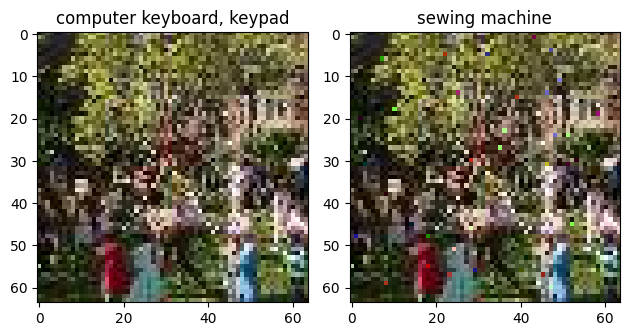

successful attack ratio: 1.0
32.55555555555556
attack on image 263


  0%|          | 32/10000 [00:00<03:27, 48.07it/s]


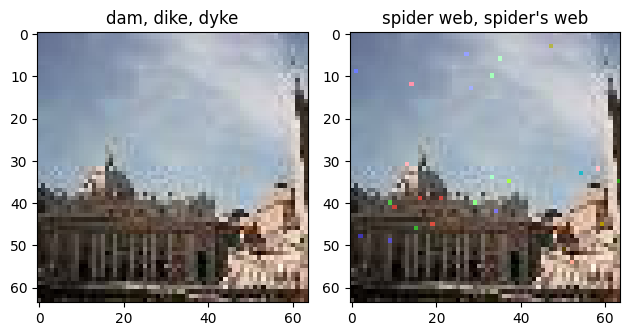

successful attack ratio: 1.0
32.546875
attack on image 264


  0%|          | 25/10000 [00:00<03:37, 45.80it/s]


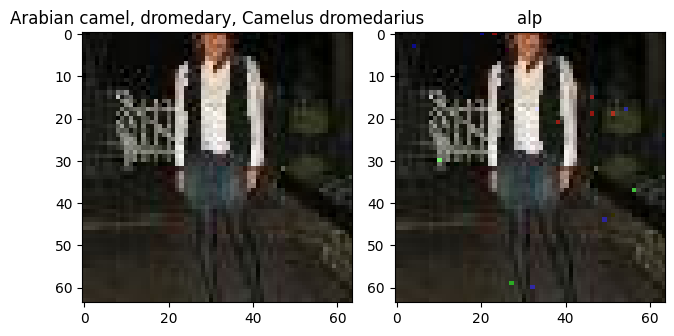

successful attack ratio: 1.0
32.43076923076923
attack on image 265


  0%|          | 1/10000 [00:00<05:39, 29.46it/s]


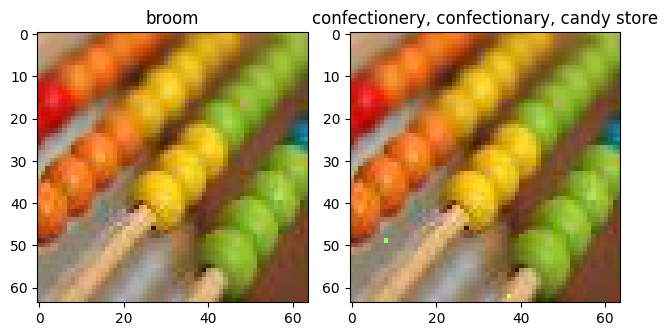

successful attack ratio: 1.0
31.954545454545453
attack on image 266


  0%|          | 0/10000 [00:00<?, ?it/s]


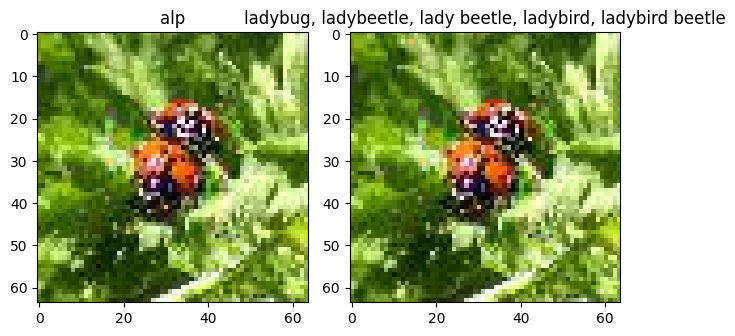

successful attack ratio: 1.0
31.47761194029851
attack on image 267


  0%|          | 28/10000 [00:00<03:42, 44.88it/s]


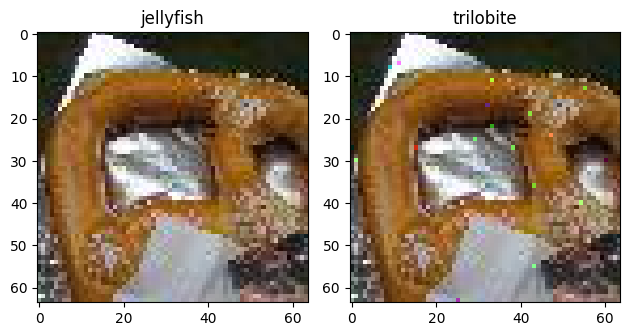

successful attack ratio: 1.0
31.426470588235293
attack on image 268


  0%|          | 9/10000 [00:00<03:38, 45.76it/s]


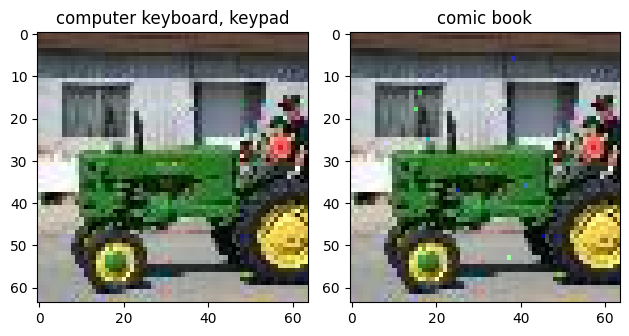

successful attack ratio: 1.0
31.10144927536232
attack on image 269


  0%|          | 49/10000 [00:01<03:55, 42.31it/s]


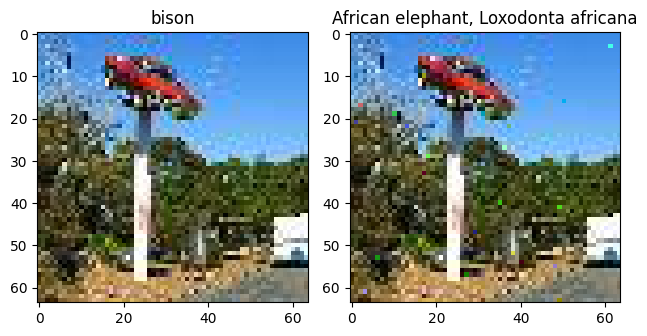

successful attack ratio: 1.0
31.357142857142858
attack on image 270


  0%|          | 21/10000 [00:00<03:58, 41.92it/s]


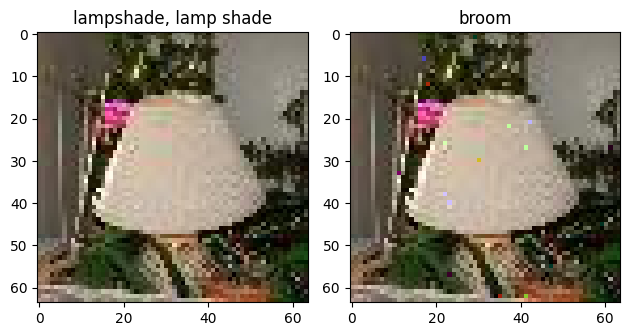

successful attack ratio: 1.0
31.211267605633804
attack on image 271


  0%|          | 5/10000 [00:00<04:21, 38.29it/s]


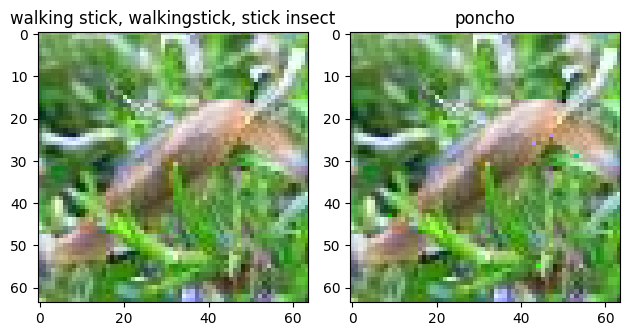

successful attack ratio: 1.0
30.84722222222222
attack on image 272


  0%|          | 17/10000 [00:00<06:06, 27.25it/s]


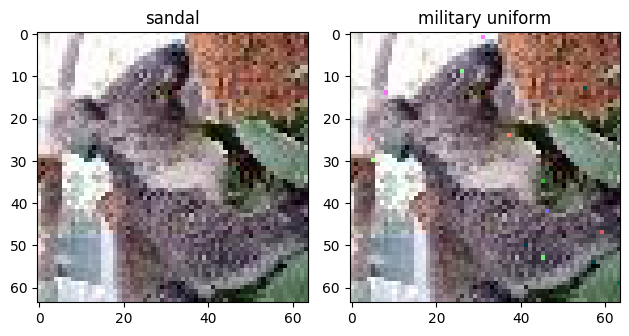

successful attack ratio: 1.0
30.65753424657534
attack on image 273


  0%|          | 7/10000 [00:00<03:51, 43.08it/s]


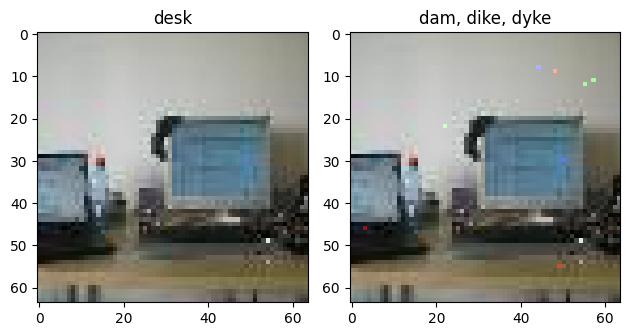

successful attack ratio: 1.0
30.33783783783784
attack on image 274


  0%|          | 2/10000 [00:00<06:20, 26.26it/s]


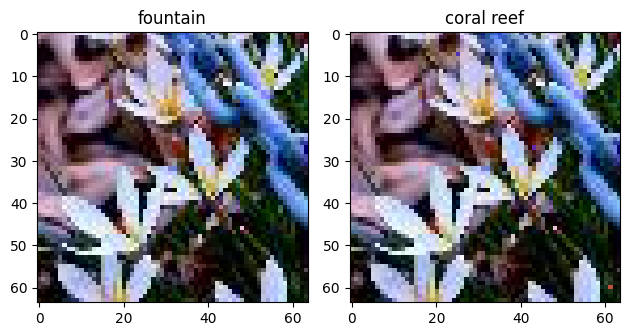

successful attack ratio: 1.0
29.96
attack on image 275


  0%|          | 0/10000 [00:00<?, ?it/s]


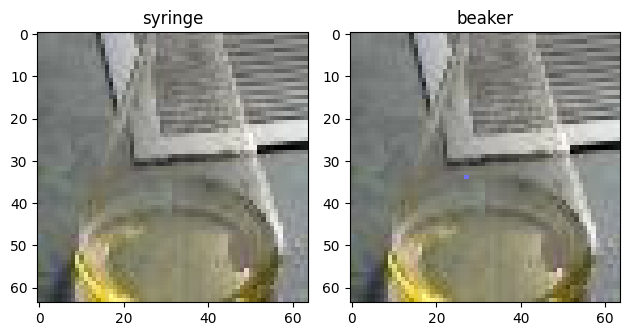

successful attack ratio: 1.0
29.56578947368421
attack on image 276


  0%|          | 24/10000 [00:00<05:34, 29.87it/s]


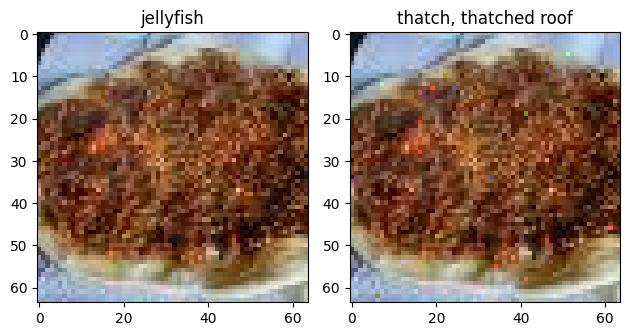

successful attack ratio: 1.0
29.493506493506494
attack on image 277


  0%|          | 3/10000 [00:00<04:22, 38.05it/s]


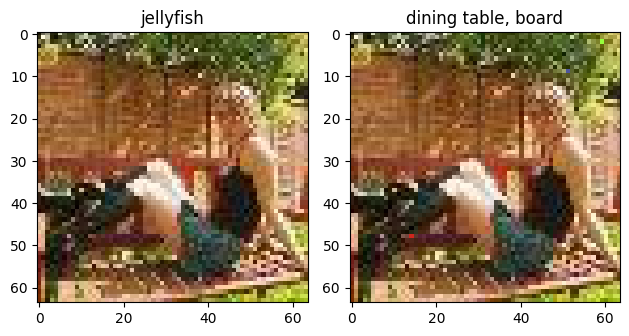

successful attack ratio: 1.0
29.153846153846153
attack on image 278


  0%|          | 7/10000 [00:00<05:06, 32.59it/s]


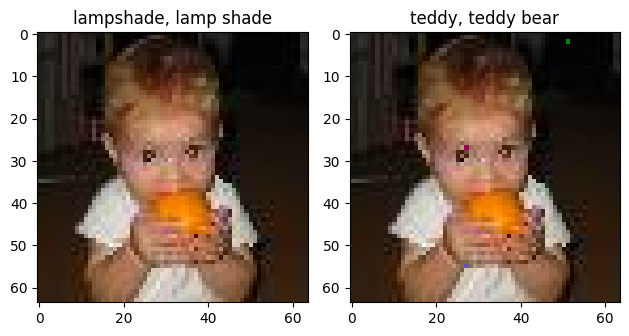

successful attack ratio: 1.0
28.873417721518987
attack on image 279


  0%|          | 13/10000 [00:00<03:48, 43.67it/s]


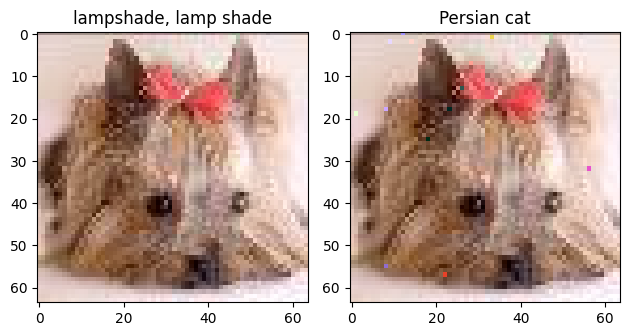

successful attack ratio: 1.0
28.675
attack on image 280


  0%|          | 6/10000 [00:00<04:35, 36.30it/s]


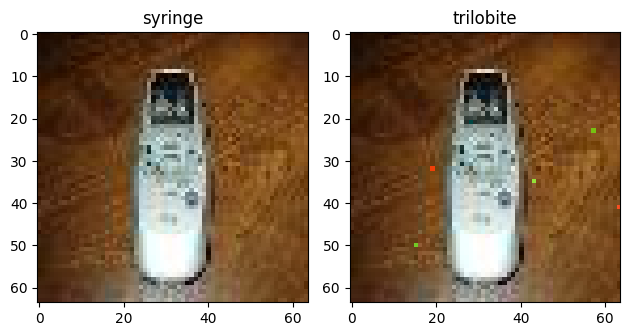

successful attack ratio: 1.0
28.395061728395063
attack on image 281


  0%|          | 12/10000 [00:00<04:20, 38.37it/s]


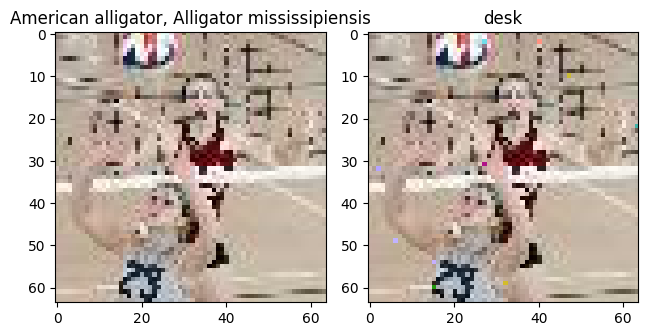

successful attack ratio: 1.0
28.195121951219512
attack on image 282


  0%|          | 29/10000 [00:00<03:54, 42.59it/s]


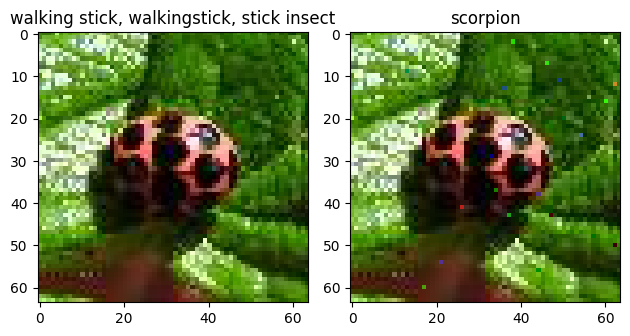

successful attack ratio: 1.0
28.204819277108435
attack on image 283


  0%|          | 3/10000 [00:00<06:23, 26.08it/s]


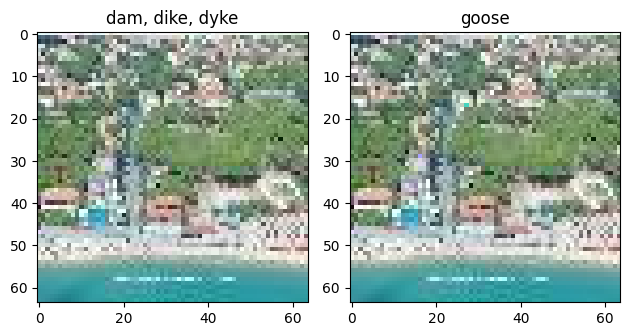

successful attack ratio: 1.0
27.904761904761905
attack on image 284


  0%|          | 17/10000 [00:00<04:31, 36.79it/s]


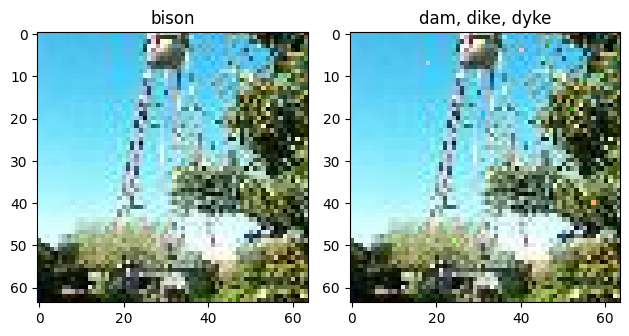

successful attack ratio: 1.0
27.776470588235295
attack on image 285


  0%|          | 12/10000 [00:00<04:06, 40.48it/s]


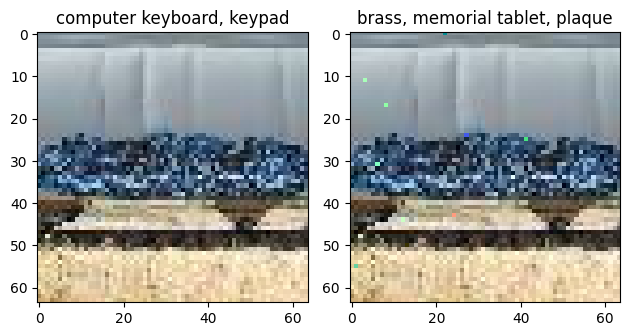

successful attack ratio: 1.0
27.593023255813954
attack on image 286


  0%|          | 31/10000 [00:00<03:18, 50.29it/s]


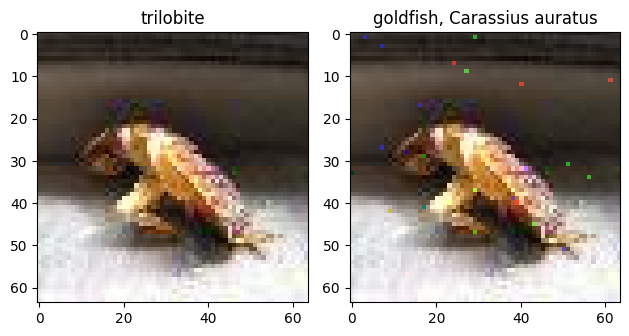

successful attack ratio: 1.0
27.632183908045977
attack on image 287


  0%|          | 19/10000 [00:00<04:37, 36.02it/s]


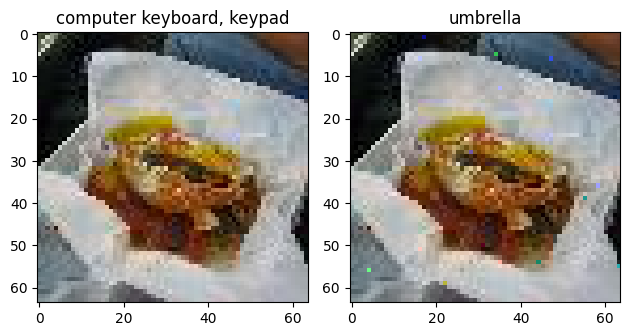

successful attack ratio: 1.0
27.53409090909091
attack on image 288


  0%|          | 3/10000 [00:00<04:43, 35.27it/s]


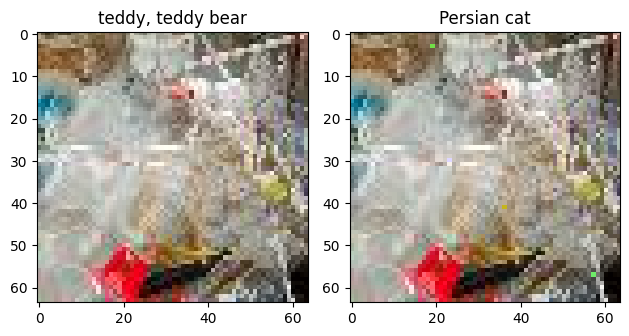

successful attack ratio: 1.0
27.258426966292134
attack on image 289


  0%|          | 8/10000 [00:00<05:52, 28.34it/s]


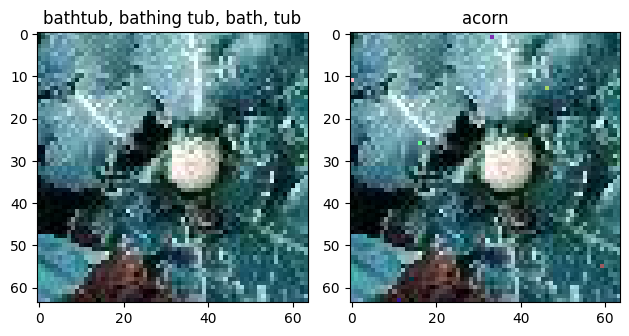

successful attack ratio: 1.0
27.044444444444444
attack on image 290


  0%|          | 30/10000 [00:00<04:59, 33.29it/s]


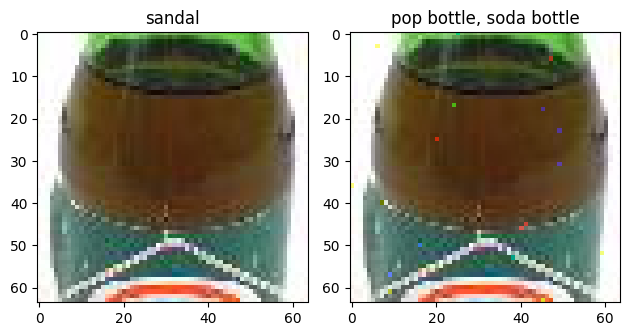

successful attack ratio: 1.0
27.076923076923077
attack on image 291


  0%|          | 19/10000 [00:00<04:10, 39.88it/s]


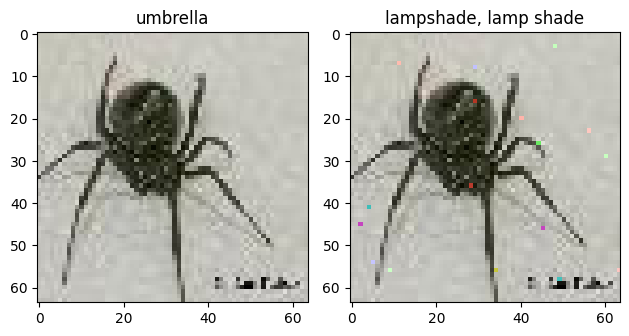

successful attack ratio: 1.0
26.98913043478261
attack on image 292


  0%|          | 35/10000 [00:00<03:49, 43.34it/s]


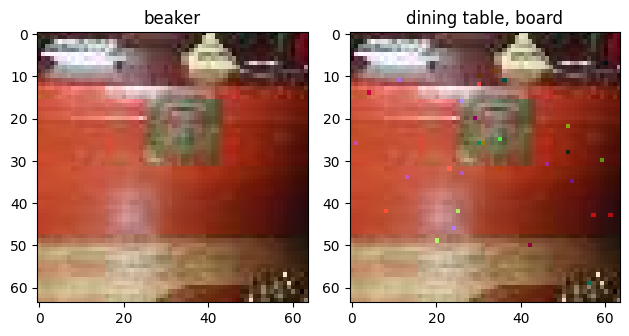

successful attack ratio: 1.0
27.0752688172043
attack on image 293


  0%|          | 11/10000 [00:00<05:01, 33.12it/s]


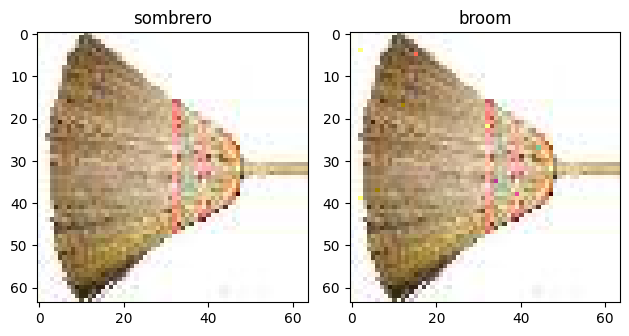

successful attack ratio: 1.0
26.904255319148938
attack on image 294


  0%|          | 10/10000 [00:00<04:51, 34.23it/s]


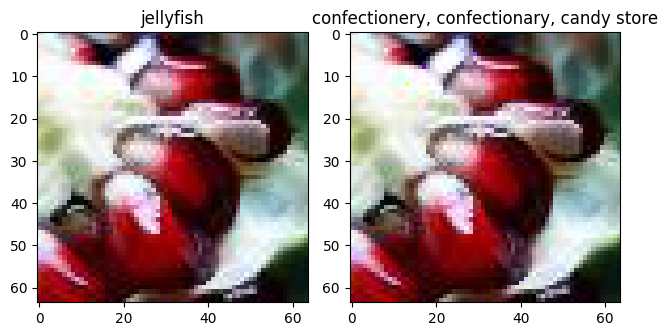

successful attack ratio: 1.0
26.726315789473684
attack on image 295


  0%|          | 10/10000 [00:00<04:27, 37.34it/s]


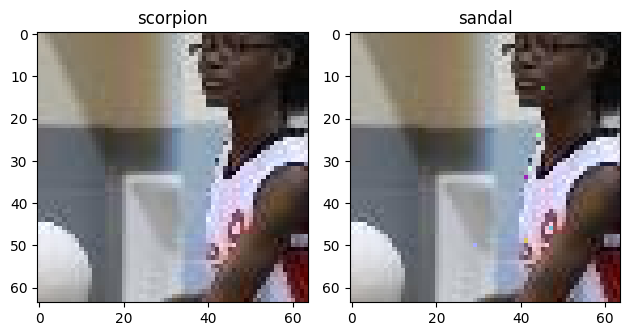

successful attack ratio: 1.0
26.552083333333332
attack on image 296


  0%|          | 30/10000 [00:00<04:02, 41.16it/s]


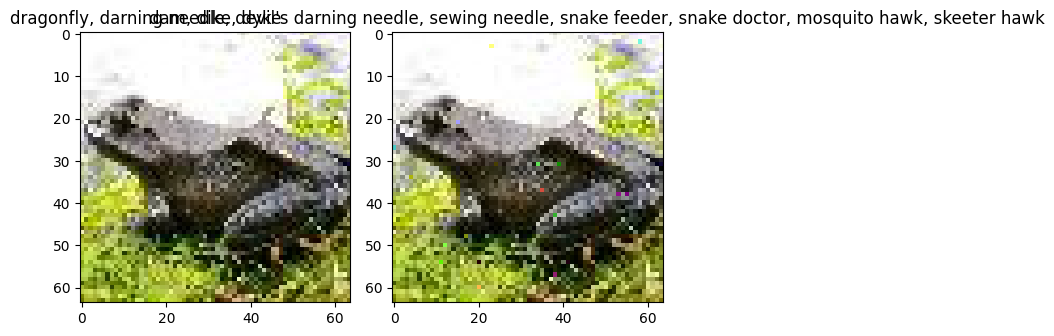

successful attack ratio: 1.0
26.587628865979383
attack on image 297


  0%|          | 7/10000 [00:00<03:34, 46.52it/s]


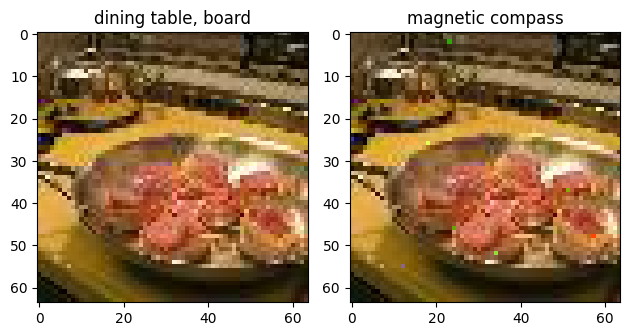

successful attack ratio: 1.0
26.387755102040817
attack on image 298


  0%|          | 26/10000 [00:00<04:20, 38.26it/s]


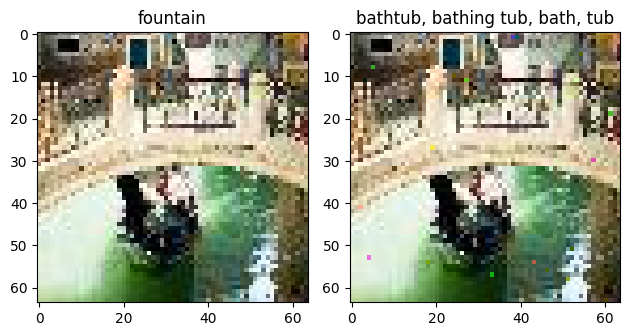

successful attack ratio: 1.0
26.383838383838384
attack on image 299


  0%|          | 27/10000 [00:00<04:23, 37.82it/s]


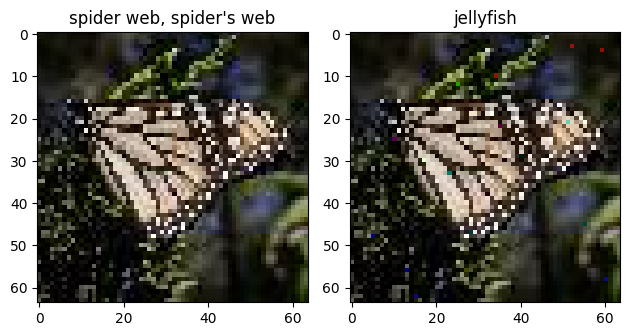

successful attack ratio: 1.0
26.39


In [ ]:
attacker = Simba('mobilenet_v2')
arr = []
img_data = []
for i in range(200,300):
  print('attack on image',i)
  img, k = attacker.getAttackIteration(testset[idx[i]])
  x,y = testset[idx[i]]
  if k != 9999:
    arr.append(k)
    img_data.append([x,img])

    fig,a =  plt.subplots(1,2)

    res = attacker.model(x.unsqueeze(0))
    res = torch.squeeze(res)
    res = res[mapping]
    actual_class = int(torch.argmax(res))
    a[0].set_title(str(labels[mapping[actual_class]]))
    a[0].imshow(np.transpose(x,(1,2,0)))

    res = attacker.model(img.unsqueeze(0))
    res = torch.squeeze(res)
    res = res[mapping]
    actual_class = int(torch.argmax(res))
    a[1].set_title(str(labels[mapping[actual_class]]))
    a[1].imshow(np.transpose(img,(1,2,0)))
    plt.tight_layout()
    plt.show()
    print('successful attack ratio:',len(arr)/(i-199))
    print(np.average(arr)) 
    pickle.dump(img_data,open('img_data_5_300','wb'))
    pickle.dump(arr,open('arr_5_300','wb'))
    pickle.dump(i,open('i_5_300','wb'))